# Problem Statement : To build a regression model to predict the calories burnt based on the given indicators in the training data. 


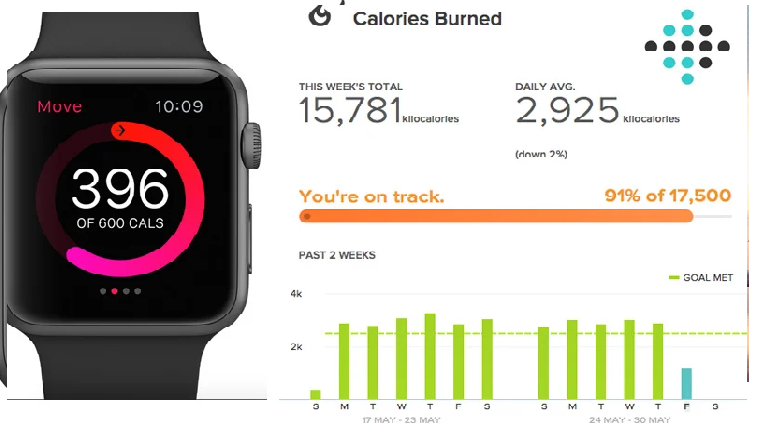

In [1]:
#Importing all the necessary Library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # FOR VISUALIZING THE DATA 


import os

In [2]:
activity = pd.read_csv('FitBit data.csv') # importing the dataset

In [3]:

from pandas_profiling import ProfileReport


In [4]:
#activity.profile_report() # seeing the full report about the dataset
ProfileReport(activity)

C:\ds\Anconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,457
Total Missing (%),0.0%
Total size in memory,53.7 KiB
Average record size in memory,120.3 B
Numeric,12
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [5]:
activity.shape # checking the number of rows and columns in the dataset

(457, 15)

In [6]:
activity.isnull().sum() # checking the number of missing values in the dataset

Id                          0
ActivityDate                0
TotalSteps                  1
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [7]:
activity.head(10) # seeing a sample of 10 rows from the dataset

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004.0,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609.0,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736.0,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231.0,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041.0,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970.0,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256.0,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262.0,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248.0,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016.0,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


In [8]:
activity1 = activity.copy() # copying the datset to activity1 and do EDA, to keep the origanal data undisturbed

In [9]:
activity1[activity1['TotalSteps'].isnull()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
27,1624580081,4/2/2016,NaN,1.01,1.01,0.0,0.0,0.0,1.01,0.01,0,0,88,1352,1327


In [10]:
activity1.drop(index=27, inplace=True)

In [11]:
activity1[activity1['TotalSteps'].isnull()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [12]:
activity1['ActivityDate'].unique() # checking out the unique activity dates in the dataset  

array(['3/25/2016', '3/26/2016', '3/27/2016', '3/28/2016', '3/29/2016',
       '3/30/2016', '3/31/2016', '4/1/2016', '4/2/2016', '4/3/2016',
       '4/4/2016', '4/5/2016', '4/6/2016', '4/7/2016', '4/8/2016',
       '4/9/2016', '4/10/2016', '4/11/2016', '4/12/2016', '3/12/2016',
       '3/13/2016', '3/14/2016', '3/15/2016', '3/16/2016', '3/17/2016',
       '3/18/2016', '3/19/2016', '3/20/2016', '3/21/2016', '3/22/2016',
       '3/23/2016', '3/24/2016'], dtype=object)

In [13]:
# adding the yearm month and date columns to the dataset
activity1['year'] = pd.DatetimeIndex(activity1['ActivityDate']).year
activity1['month'] = pd.DatetimeIndex(activity1['ActivityDate']).month
activity1['date'] = pd.DatetimeIndex(activity1['ActivityDate']).day


In [14]:
activity1.head(10) # cheking out the datset after transformation

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,3/25/2016,11004.0,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,3/26/2016,17609.0,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,3/27/2016,12736.0,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,3/28/2016,13231.0,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,3/29/2016,12041.0,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29
5,1503960366,3/30/2016,10970.0,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30
6,1503960366,3/31/2016,12256.0,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31
7,1503960366,4/1/2016,12262.0,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1
8,1503960366,4/2/2016,11248.0,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2
9,1503960366,4/3/2016,10016.0,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3


In [15]:
activity1[activity1["TrackerDistance"] != activity1["TotalDistance"]]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
139,2891001357,4/2/2016,4126.0,3.22,0.00,3.218688,0.00,0.00,3.22,0.00,0,0,720,720,2881,2016,4,2
142,2891001357,4/5/2016,2063.0,1.61,0.00,1.609344,0.00,0.00,1.61,0.00,0,0,630,99,1144,2016,4,5
215,4057192912,3/30/2016,5419.0,4.00,4.57,0.055843,0.00,0.00,3.91,0.06,0,0,145,1295,2259,2016,3,30
335,6391747486,4/2/2016,2101.0,2.03,0.00,2.027773,2.03,0.00,0.00,0.00,46,0,0,1394,2224,2016,4,2
338,6391747486,4/5/2016,9766.0,7.51,0.78,6.727057,0.00,0.05,7.46,0.00,0,6,301,1133,2442,2016,4,5
359,6962181067,4/6/2016,12480.0,8.86,8.25,3.972795,4.18,0.69,4.00,0.00,55,14,276,593,2170,2016,4,6
360,6962181067,4/7/2016,13417.0,9.65,8.87,1.926302,3.39,1.25,4.91,0.10,45,16,284,665,2244,2016,4,7
361,6962181067,4/8/2016,14400.0,10.88,9.52,5.456864,2.47,2.88,5.53,0.00,27,37,276,697,2188,2016,4,8
364,6962181067,4/11/2016,12362.0,9.09,8.17,2.696455,1.09,2.73,5.27,0.00,21,38,297,678,2188,2016,4,11
366,7007744171,4/1/2016,11680.0,9.06,7.81,4.901283,4.49,0.33,4.24,0.00,50,7,244,1139,2573,2016,4,1


In [16]:
activity1=activity1.drop(['TrackerDistance'],axis=1)  #dropping the TrackerDistance column, as it is almost same as the total distance column and is highly co-related to the total distance  

In [17]:
activity1.head(10) # cheking out the first 10 rows of the datset after transformation

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,3/25/2016,11004.0,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,3/26/2016,17609.0,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,3/27/2016,12736.0,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,3/28/2016,13231.0,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,3/29/2016,12041.0,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29
5,1503960366,3/30/2016,10970.0,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30
6,1503960366,3/31/2016,12256.0,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31
7,1503960366,4/1/2016,12262.0,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1
8,1503960366,4/2/2016,11248.0,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2
9,1503960366,4/3/2016,10016.0,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3


Text(0.5, 1.0, 'Box plot of Calories with Jitter by day of the month')

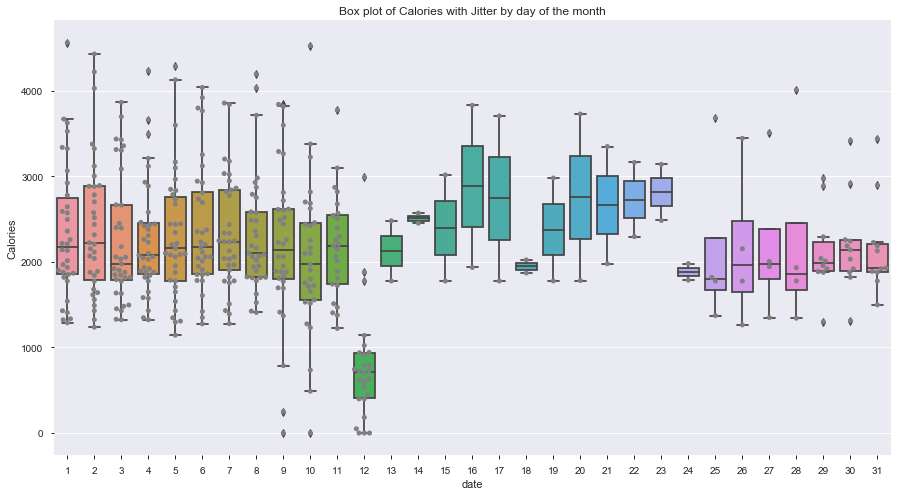

In [18]:
### Group by the day of the month and make a boxplot of calories burnt
%matplotlib inline 
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(15,8))

# Usual boxplot
ax = sns.boxplot(x='date', y='Calories', data=activity1)
 
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='date', y='Calories', data=activity1, color="grey")

ax.set_title('Box plot of Calories with Jitter by day of the month')

In [19]:
activity1=activity1.drop(['ActivityDate'],axis=1)

In [20]:
activity1.head(10) # cheking out the datset after transformation

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,11004.0,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,17609.0,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,12736.0,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,13231.0,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,12041.0,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29
5,1503960366,10970.0,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30
6,1503960366,12256.0,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31
7,1503960366,12262.0,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1
8,1503960366,11248.0,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2
9,1503960366,10016.0,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3


Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

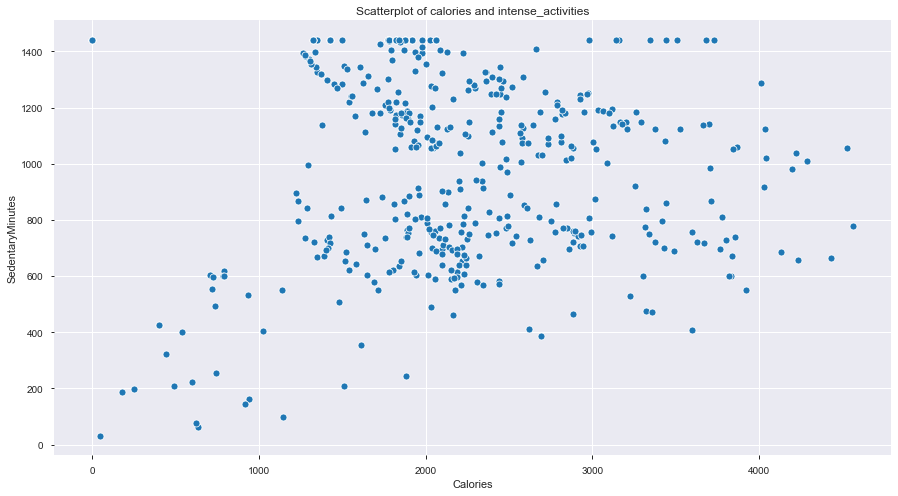

In [21]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='SedentaryMinutes', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

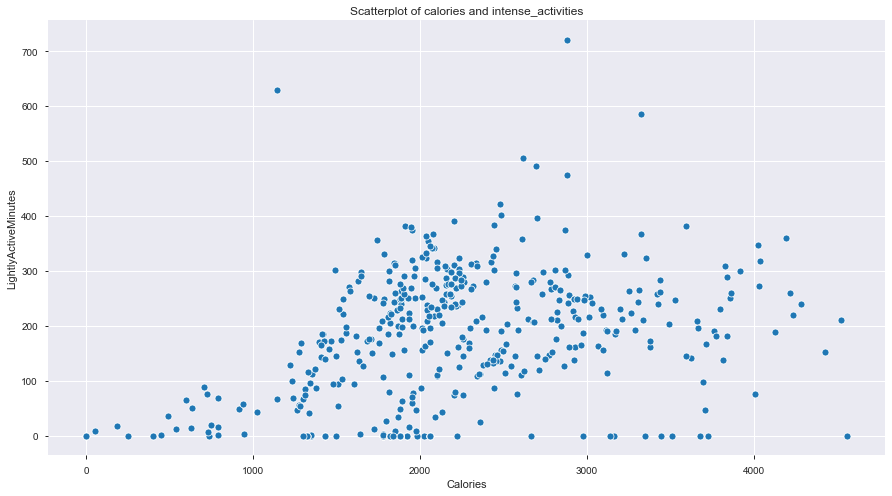

In [22]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='LightlyActiveMinutes', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories vs Fairly Active Minutes')

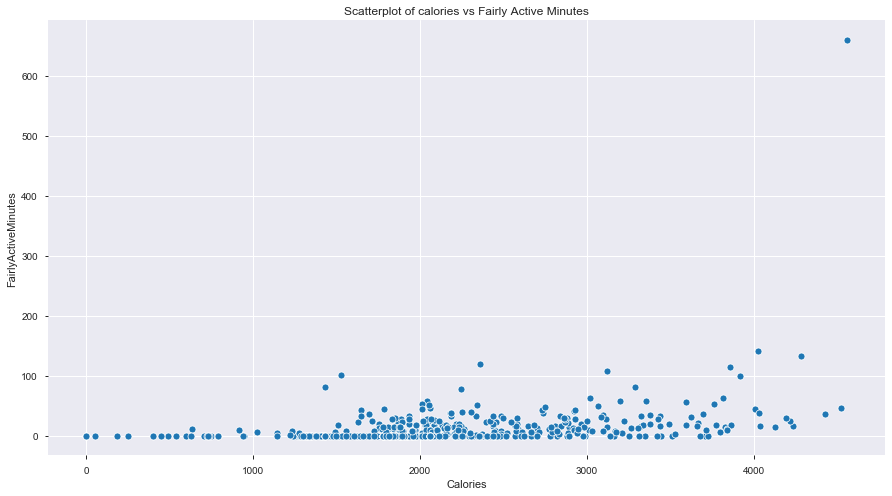

In [23]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt in the moderately active minutes
ax = sns.scatterplot(x='Calories', y='FairlyActiveMinutes', data=activity1)

ax.set_title('Scatterplot of calories vs Fairly Active Minutes')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

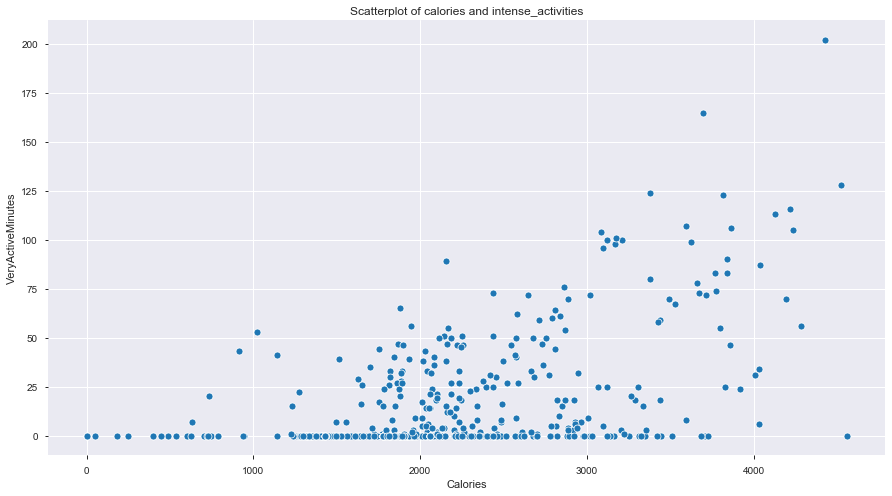

In [24]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt in the intensely active minutes
ax = sns.scatterplot(x='Calories', y='VeryActiveMinutes', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

In [25]:
activity1.shape # cheking the number of rows and columns in the transformed  dataset

(456, 16)

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on activity minutes')

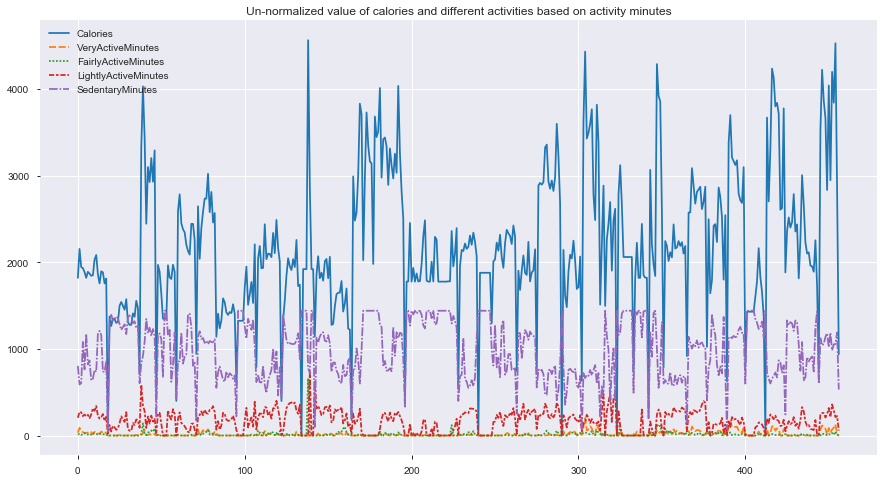

In [26]:
## plot the raw values 

col_select = ['Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
wide_df = activity1[col_select]

# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df)

ax.set_title('Un-normalized value of calories and different activities based on activity minutes')

The  EDA here gives us the insight about the relation between the active hours, the distance for which the user has moderate and intense activity and the calories burnt during that period. 

In [49]:
x=activity1.drop(columns=['Id','TotalDistance','Calories' ]) # dropping 'TotalDistance', as they are highly correlated to Total Steps
y=activity1['Calories']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25)

Handling Categorical variables

In [51]:
# From the info above it could be observed that many colmns are of object type. So, converting those categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

Now the data is ready, Build the ML models

In [52]:
from sklearn.ensemble import RandomForestRegressor
import random

In [53]:
random.seed(49)
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
pred=reg.predict(x_test)

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.6206604562833526

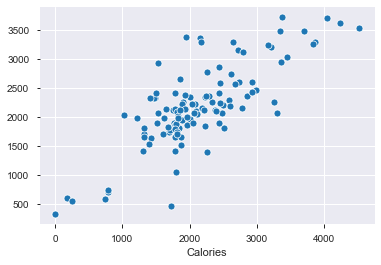

In [56]:
sns.scatterplot(y_test, pred)

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid_rf = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
    "random_state":[0,50,100]

            }
            # Creating an object of the Grid Search class
grid= GridSearchCV(RandomForestRegressor(),param_grid_rf, verbose=3,cv=2,n_jobs=-1)
            # finding the best parameters
grid.fit(x_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    5.5s finished


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [59]:
grid.best_score_

0.5245822096240194

In [60]:
predictons = grid.predict(x_test)

In [61]:
r2_score(y_test,predictons)

0.6141935043866923

In [62]:
grid.best_params_

{'max_depth': 8, 'n_estimators': 130, 'random_state': 50}

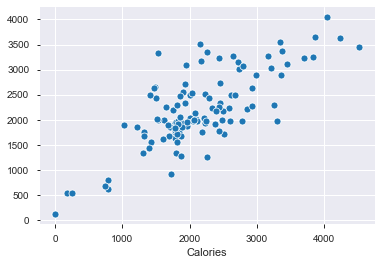

In [74]:
sns.scatterplot(y_test, predictons)

In [63]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
from xgboost import XGBRegressor

In [72]:
param_grid_xgb = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
                "random_state":[0,50,100]

            }
            # Creating an object of the Grid Search class
grid= GridSearchCV(XGBRegressor(),param_grid_xgb, verbose=3,cv=2,n_jobs=-1)
            # finding the best parameters
grid.fit(x_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  23 out of 144 | elapsed:    0.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  72 out of 144 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    1.0s finished


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [66]:
grid.best_score_

0.5081342314361126

In [67]:
predictons = grid.predict(x_test)

In [68]:
r2_score(y_test,predictons)

0.5648349118282241

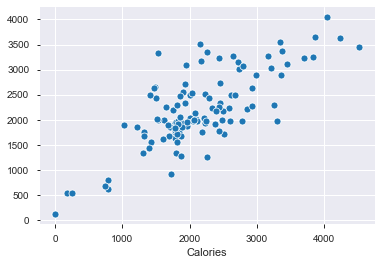

In [75]:
sns.scatterplot(y_test,predictons)